# Crop&Scale系
1. RandomCrop
1. ShiftScaleRotate (Rotate系に記載)
1. CenterCrop
1. PadIfNeeded
1. Crop
1. RandomScale
1. LongestMaxSize
1. SmallestMaxSize
1. Resize
1. RandomSizedCrop
1. RandomCropNearBBox
1. RandomSizedBBoxSafeCrop

In [1]:
from albumentations import (
    RandomCrop,
    CenterCrop,
    PadIfNeeded,
    Crop,
    RandomScale,
    LongestMaxSize,
    SmallestMaxSize,
    Resize,
    RandomSizedCrop,
    RandomCropNearBBox,
    RandomSizedBBoxSafeCrop
    )
from utils import *

In [2]:
data = get_data()
image = data['image']
image_seg = data['seg_img']
mask = data['mask']
image_det = data['det_img']
bboxes = data['bboxes']

## RandomCrop

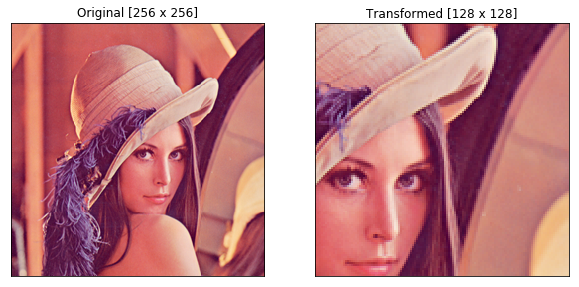

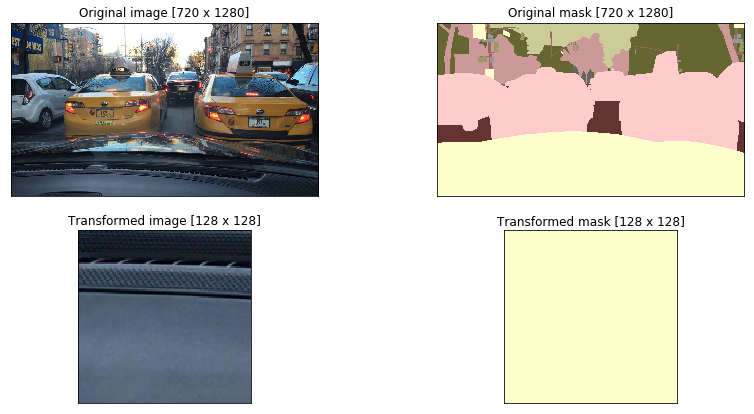

In [3]:
"""Crop a random part of the input.

Args:
    height (int): height of the crop.
    width (int): width of the crop.
    p (float): probability of applying the transform. Default: 1.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32
"""
trans = RandomCrop(height=128, width=128, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## CenterCrop

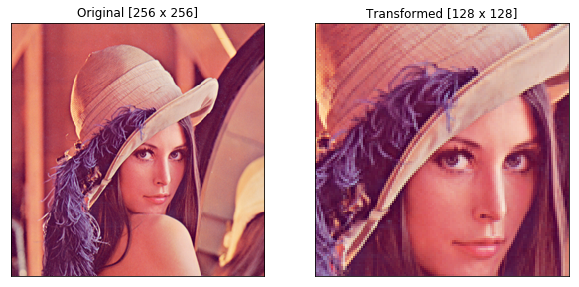

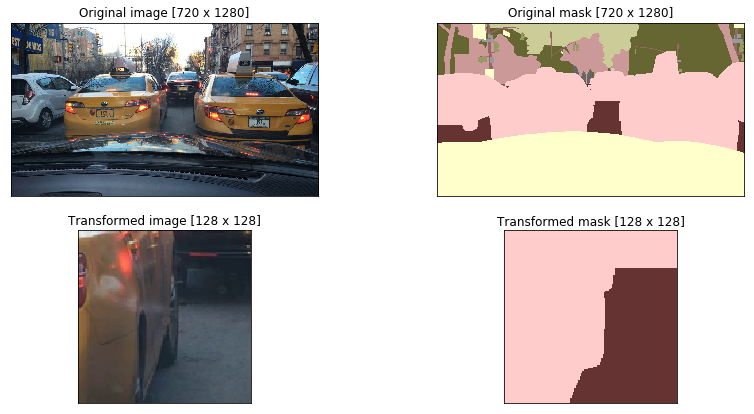

In [4]:
"""Crop the central part of the input.

Args:
    height (int): height of the crop.
    width (int): width of the crop.
    p (float): probability of applying the transform. Default: 1.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32

Note:
    It is recommended to use uint8 images as input.
    Otherwise the operation will require internal conversion
    float32 -> uint8 -> float32 that causes worse performance.
"""

trans = CenterCrop(height=128, width=128, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## PadIfNeeded

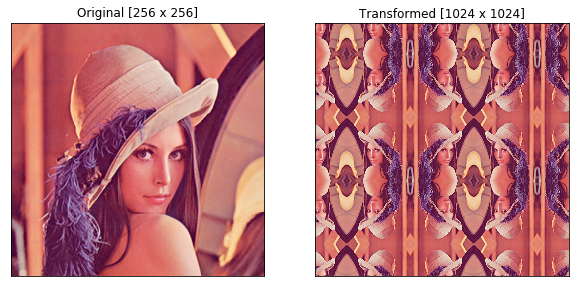

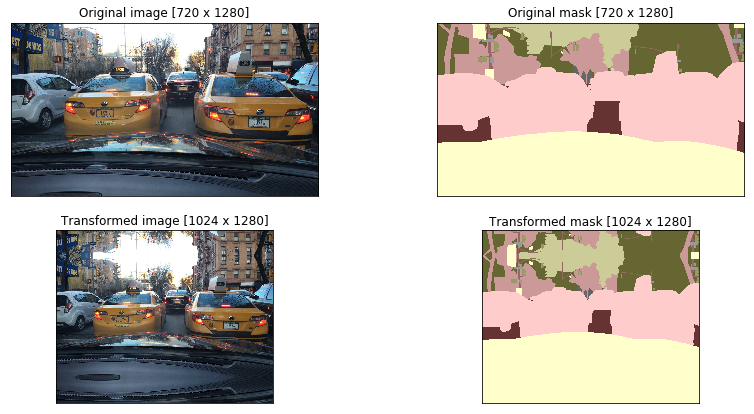

In [5]:
"""Pad side of the image / max if side is less than desired number.

Args(非公式):
    min_height (int): minimam height of padding image. If height of original image is greater than min_height,
            height of output is not changed. Default: 1024.
    min_width (int): minimam width of padding image. If width of original image is greater than min_width,
            width of output is not changed. Default: 1024.
    border_mode (OpenCV flag): flag that is used to specify the pixel extrapolation method. Should be one of:
        cv2.BORDER_CONSTANT, cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, cv2.BORDER_WRAP, cv2.BORDER_REFLECT_101.
        Default: cv2.BORDER_REFLECT_101
    p (float): probability of applying the transform. Default: 1.0.
    value (list of ints [r, g, b]): padding value if border_mode is cv2.BORDER_CONSTANT.

Targets:
    image, mask, bbox, keypoints

Image types:
    uint8, float32

Comment:
    min_heightやmin_widthよりも入力画像が大きければ、高さや幅は変わりません。
    もしも、それより大きければ、border_modeに従うPaddingがなされて拡大します。
"""

trans = PadIfNeeded(min_height=1024, min_width=1024, border_mode=2, value=None, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## Crop

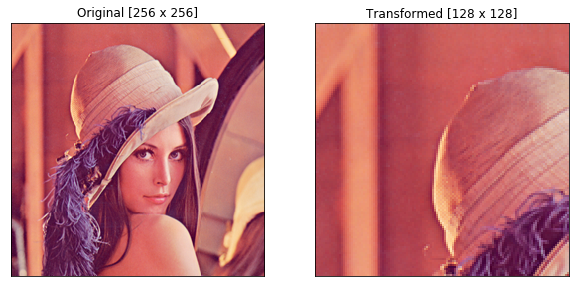

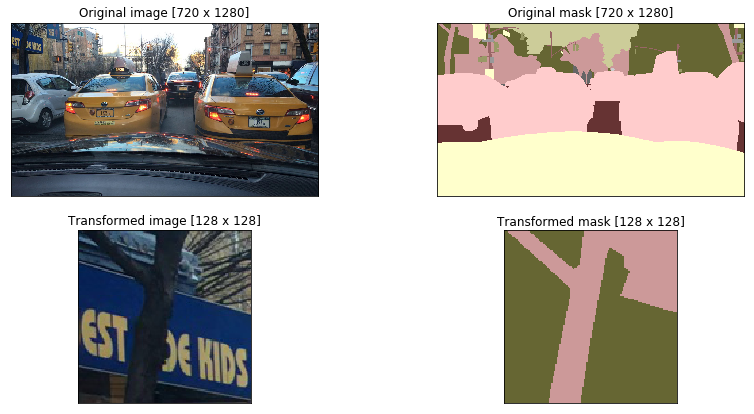

In [6]:
"""Crop region from image.

Args:
    x_min (int): minimum upper left x coordinate
    y_min (int): minimum upper left y coordinate
    x_max (int): maximum lower right x coordinate
    y_max (int): maximum lower right y coordinate

Targets:
    image, mask, bboxes

Image types:
    uint8, float32

Comment:
    任意のサイズにCropします。引数は与える画像のサイズ内にしてください。
"""
trans = Crop(x_min=0, y_min=0, x_max=128, y_max=128, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## RandomScale

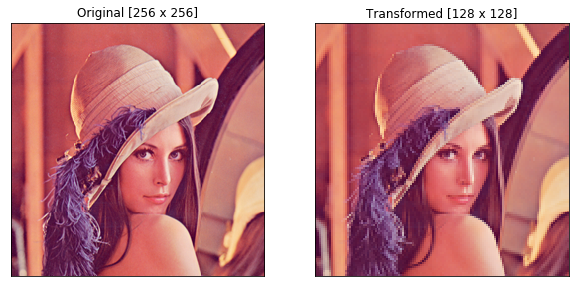

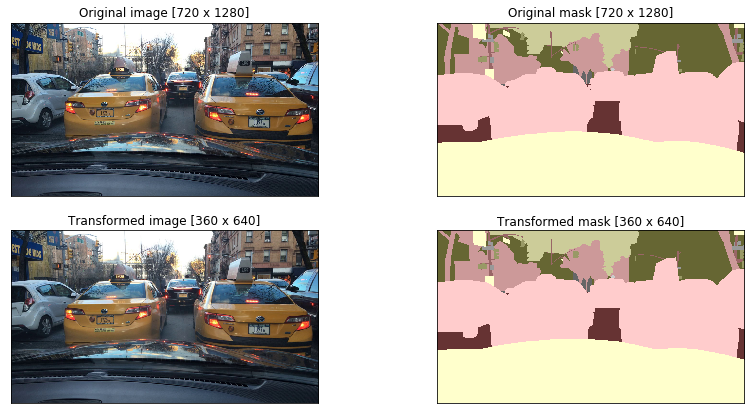

In [7]:
"""Randomly resize the input. Output image size is different from the input image size.

Args:
    scale_limit ((float, float) or float): scaling factor range. If scale_limit is a single float value, the
        range will be (1 - scale_limit, 1 + scale_limit). Default: 0.1.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    p (float): probability of applying the transform. Default: 0.5.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32

Comment:
    scale_limitに1つの値を与えた場合は、(1 - scale_limit, 1 + scale_limit)の範囲、タプルを与えた場合は、
    その範囲内からランダムに値が選ばれます。
    注意点としては、1+選ばれた数値の割合だけ拡大縮小されるので、1.0が選ばれれば、画像は2.0倍、-0.5が選ばれれば0.5倍、
    つまり半分のサイズに画像が変換されます。
"""

trans = RandomScale(scale_limit=(-0.5, -0.5), interpolation=1, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## LongestMaxSize

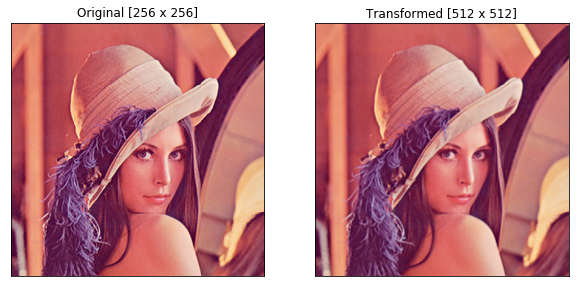

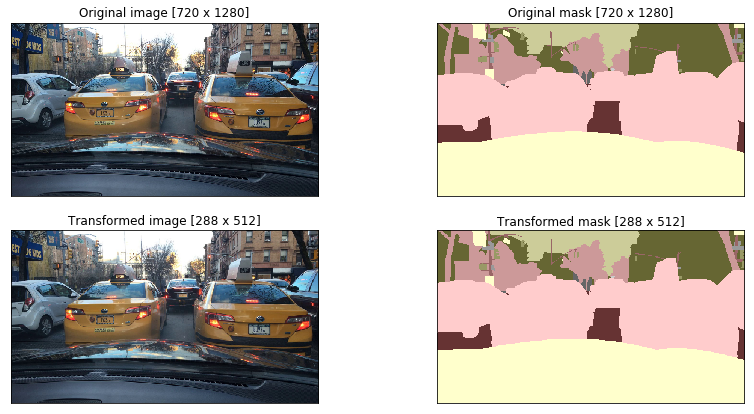

In [8]:
"""Rescale an image so that maximum side is equal to max_size, keeping the aspect ratio of the initial image.

Args:
    p (float): probability of applying the transform. Default: 1.
    max_size (int): maximum size of the image after the transformation

Targets:
    image, mask, bboxes

Image types:
    uint8, float32
    
Comment:
    入力画像の縦横比を維持しながら、最大の辺の長さをmax_sizeに与えた画像サイズに変換します。
"""
trans = LongestMaxSize(max_size=512, interpolation=1, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## SmallestMaxSize

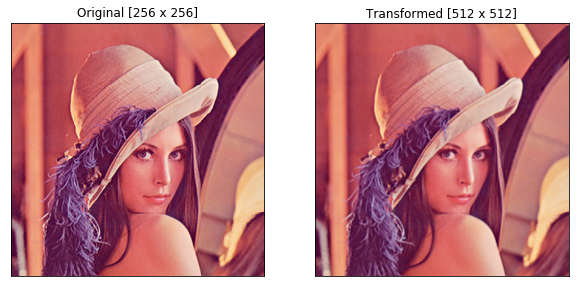

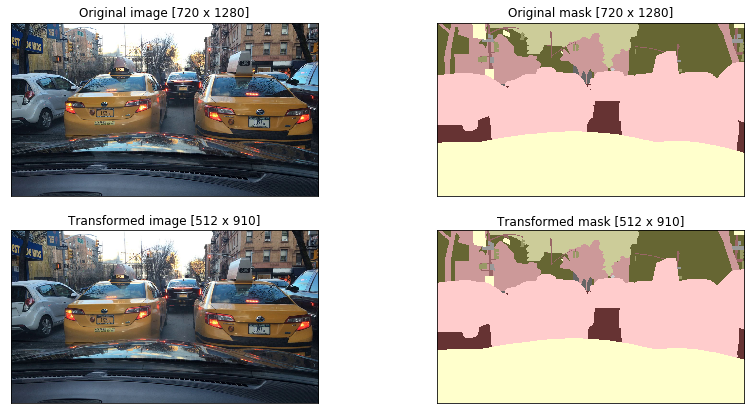

In [9]:
"""Rescale an image so that minimum side is equal to max_size, keeping the aspect ratio of the initial image.

Args:
    p (float): probability of applying the transform. Default: 1.
    max_size (int): maximum size of smallest side of the image after the transformation

Targets:
    image, mask, bboxes

Image types:
    uint8, float32
    
Comment:
    入力画像の縦横比を維持しながら、最小の辺の長さをmin_sizeに与えた画像サイズに変換します。
"""
trans = SmallestMaxSize(max_size=512, interpolation=1, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## Resize

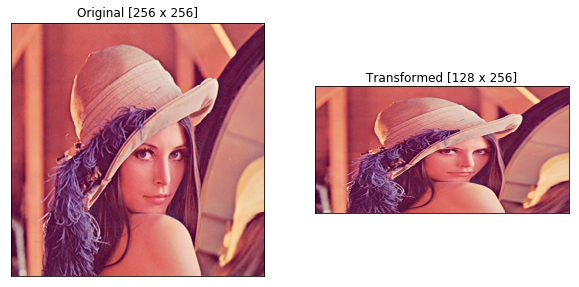

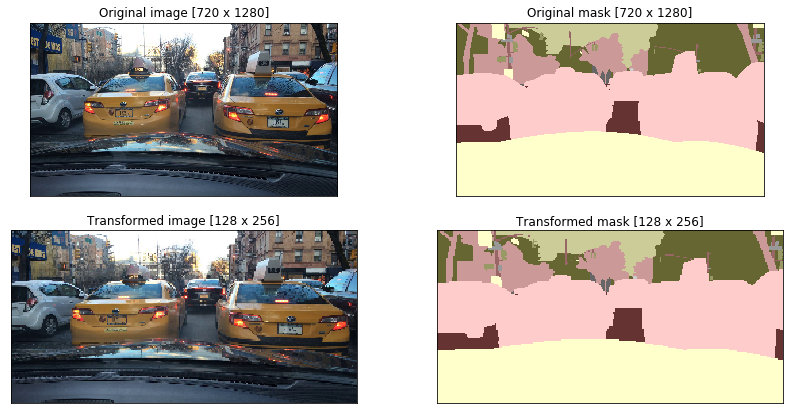

In [10]:
"""Resize the input to the given height and width.

Args:
    p (float): probability of applying the transform. Default: 1.
    height (int): desired height of the output.
    width (int): desired width of the output.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.

Targets:
    image, mask, bboxes

Image types:
    uint8, float32

Comment:
    与えた任意の height(縦) x width(横)サイズに画像を変換します。
"""

trans = Resize(height=128, width=256, interpolation=1, always_apply=False, p=1)
imshow2(image, transforms=trans)
imshow4(image_seg, mask, transforms=trans)

## RandomSizeCrop

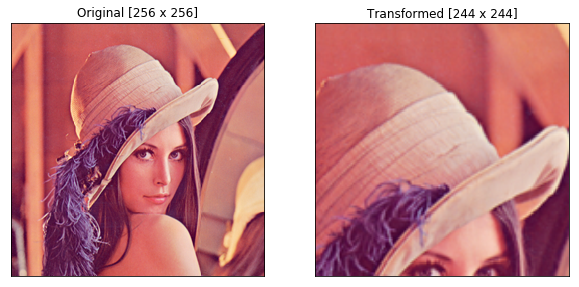

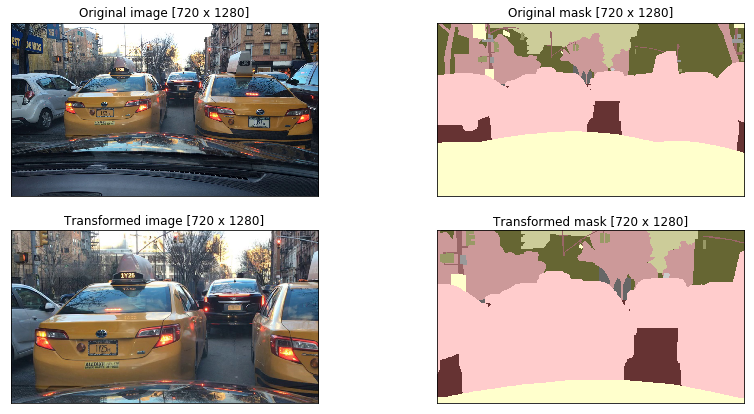

In [11]:
"""Crop a random part of the input and rescale it to some size.

Args:
    min_max_height ((int, int)): crop size limits.
    height (int): height after crop and resize.
    width (int): width after crop and resize.
    w2h_ratio (float): aspect ratio of crop.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    p (float): probability of applying the transform. Default: 1.

Targets:
    image, mask, bboxes, keypoints

Image types:
    uint8, float32
    
Comment:
    min_max_heightの範囲内でランダムにCropの高さが選ばれ、その高さ x 与えたw2h_ratioがCropの幅として設定されます。
    例えば、Cropの高さが128とし、w2h_ratioに2.0を与えると、Cropサイズは　128x256　になります。
    Cropされた部分は、引数として与えた　height x width　のサイズに変換されます。
"""
trans = RandomSizedCrop(min_max_height=(128, 244), height=244, width=244, w2h_ratio=1.0,
                        interpolation=1, always_apply=False, p=1.0)
imshow2(image, transforms=trans)
trans = RandomSizedCrop(min_max_height=(400, 700), height=720, width=1280, w2h_ratio=1280/720,
                        interpolation=1, always_apply=False, p=1.0)
imshow4(image_seg, mask, transforms=trans)

## RandomCropNearBBox

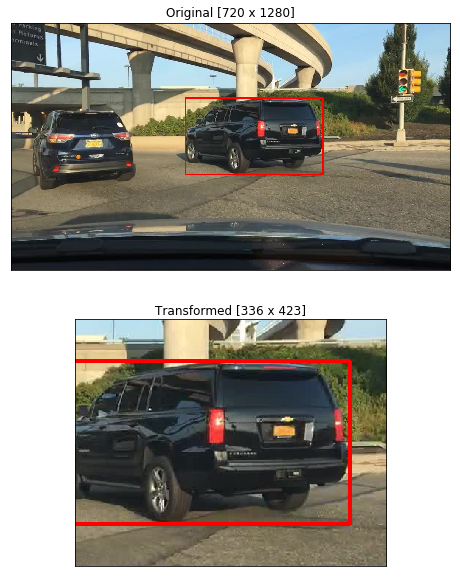

In [12]:
"""Crop bbox from image with random shift by x,y coordinates

Args:
    max_part_shift (float): float value in (0.0, 1.0) range. Default 0.3
    p (float): probability of applying the transform. Default: 1.

Targets:
    image

Image types:
    uint8, float32

Comment:
    与えたbbox近くをランダムにシフトした部分をCropした画像に変換します。
    注意点としては、bboxは複数与えられません。1つだけ与えてください。加えて、このbboxだけは、alubmentationsのフォーマット([0,1])ではなく、
    Pascal VOCのフォーマット[x_min, y_min, x_max, y_max]で渡してください。
    
    callableには、image, cropping_bboxを与えてください。
"""

img=putBbox(image_det, [bboxes[5]])
trans = RandomCropNearBBox(max_part_shift=0.3, always_apply=False, p=1.0)
tsf_dict = trans(image=img, cropping_bbox=bboxes[5])
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax[0].tick_params(labelbottom="off",bottom="off")
ax[0].tick_params(labelleft="off",left="off")
ax[1].tick_params(labelbottom="off",bottom="off")
ax[1].tick_params(labelleft="off",left="off")
ax[0].set_title('Original [{} x {}]'.format(img.shape[0], img.shape[1]))
ax[1].set_title('Transformed [{} x {}]'.format(tsf_dict['image'].shape[0], tsf_dict['image'].shape[1]))
ax[0].imshow(img.astype('uint8'))
ax[1].imshow(tsf_dict['image'].astype('uint8'))
fig.show()

## RandomSizedBBoxSafeCrop

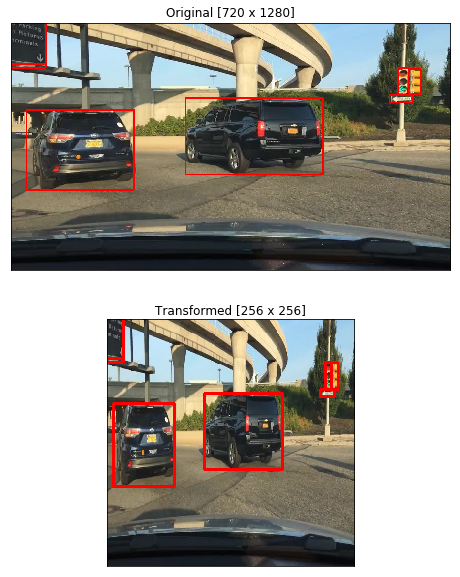

In [13]:
"""Crop a random part of the input and rescale it to some size without loss of bboxes.

Args:
    height (int): height after crop and resize.
    width (int): width after crop and resize.
    erosion_rate (float): erosion rate applied on input image height before crop.
    interpolation (OpenCV flag): flag that is used to specify the interpolation algorithm. Should be one of:
        cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.
        Default: cv2.INTER_LINEAR.
    p (float): probability of applying the transform. Default: 1.

Targets:
    image, mask, bboxes

Image types:
    uint8, float32
    
Comment:
    バウンディングボックス情報とともに画像をランダムにscale&cropします。
    callableには、image, bboxesを与えてください。
"""

# Pascal VOC フォーマットから albumentations フォーマットにバウンディングボックスを変換します。
bbox_albu = albu.augmentations.bbox_utils.convert_bboxes_to_albumentations(bboxes=bboxes, source_format='pascal_voc',
                                                                            rows=image_det.shape[0], cols=image_det.shape[1], check_validity=False)
trans = RandomSizedBBoxSafeCrop(height=256, width=256, erosion_rate=0.2, interpolation=1, always_apply=False, p=1.0)
tsf_dict = trans(image=image_det, bboxes=bbox_albu)
tsf, tsf_bb = tsf_dict['image'], tsf_dict['bboxes']
# albumentationsのフォーマットからPascal VOCのフォーマットに変換 (注意: rows, colsには変換後の画像サイズを入力する。)
tsf_bb = albu.augmentations.bbox_utils.convert_bboxes_from_albumentations(bboxes=tsf_bb, target_format='pascal_voc',
                                                                    rows=tsf.shape[0], cols=tsf.shape[1], check_validity=False)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))
ax[0].tick_params(labelbottom="off",bottom="off")
ax[0].tick_params(labelleft="off",left="off")
ax[1].tick_params(labelbottom="off",bottom="off")
ax[1].tick_params(labelleft="off",left="off")
ax[0].set_title('Original [{} x {}]'.format(image_det.shape[0], image_det.shape[1]))
ax[1].set_title('Transformed [{} x {}]'.format(tsf.shape[0], tsf.shape[1]))
ax[0].imshow(putBbox(image_det, bboxes,thickness=3).astype('uint8'))
ax[1].imshow(putBbox(tsf, tsf_bb, thickness=2).astype('uint8'))
fig.show()